In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix , accuracy_score , recall_score , f1_score , classification_report
import warnings 

from sklearn.preprocessing import LabelEncoder , OneHotEncoder , StandardScaler , MinMaxScaler
from sklearn.impute import SimpleImputer

warnings.filterwarnings('ignore')

In [30]:
dataset = pd.read_csv("healthcare-dataset-stroke-data(1).xls")

# Explore Data

In [31]:
dataset.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [32]:
dataset.shape

(5110, 12)

In [33]:
dataset.duplicated().sum()

0

In [34]:
dataset.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [35]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [36]:
dataset.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


# Clean Dataset

In [37]:
dataset.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [38]:
dataset.drop(['id'] , axis = 1 , inplace=True)

In [39]:
dataset.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [40]:
dataset.bmi.isna().sum()

201

In [41]:
dataset.dropna(axis = 0, inplace = True)
dataset.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [42]:
dataset.ever_married.value_counts()

Yes    3204
No     1705
Name: ever_married, dtype: int64

In [43]:
l = LabelEncoder()
dataset.ever_married = l.fit_transform(dataset.ever_married)

In [44]:
dataset.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,1,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,1,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,1,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,1,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,1,Private,Urban,186.21,29.0,formerly smoked,1


In [45]:
dataset["gender"] = dataset["gender"].replace(["Male", "Female"], [1, 0])

In [46]:
dataset.drop(dataset[dataset['gender'] == 'Other'].index, inplace=True)

In [47]:
dataset.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,Private,Urban,228.69,36.6,formerly smoked,1
2,1,80.0,0,1,1,Private,Rural,105.92,32.5,never smoked,1
3,0,49.0,0,0,1,Private,Urban,171.23,34.4,smokes,1
4,0,79.0,1,0,1,Self-employed,Rural,174.12,24.0,never smoked,1
5,1,81.0,0,0,1,Private,Urban,186.21,29.0,formerly smoked,1


In [48]:
dataset.work_type.value_counts()

Private          2810
Self-employed     775
children          671
Govt_job          630
Never_worked       22
Name: work_type, dtype: int64

In [49]:
dataset.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,Private,Urban,228.69,36.6,formerly smoked,1
2,1,80.0,0,1,1,Private,Rural,105.92,32.5,never smoked,1
3,0,49.0,0,0,1,Private,Urban,171.23,34.4,smokes,1
4,0,79.0,1,0,1,Self-employed,Rural,174.12,24.0,never smoked,1
5,1,81.0,0,0,1,Private,Urban,186.21,29.0,formerly smoked,1


In [50]:
dataset_dummies = pd.get_dummies(dataset , columns=['work_type' , "smoking_status" , 'Residence_type'] , drop_first=True)
dataset = dataset_dummies

In [51]:
scaler = StandardScaler()
dataset[["age", "avg_glucose_level", "bmi"]] = scaler.fit_transform(dataset[["age", "avg_glucose_level", "bmi"]])

In [52]:
dataset.head()

,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,Residence_type_Urban
0,1,1.069938,0,1,1,2.777797,0.981145,1,0,1,0,0,1,0,0,1
2,1,1.646336,0,1,1,0.014016,0.459086,1,0,1,0,0,0,1,0,0
3,0,0.271847,0,0,1,1.484266,0.701016,1,0,1,0,0,0,0,1,1
4,0,1.601998,1,0,1,1.549325,-0.623231,1,0,0,1,0,0,1,0,0
5,1,1.690675,0,0,1,1.821493,0.013426,1,0,1,0,0,1,0,0,1


# Visualization

In [53]:
dataset.corr()

,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,Residence_type_Urban
age,1.000000,0.274395,0.257104,0.680742,0.236000,0.333314,0.232313,-0.079399,0.120169,0.327306,-0.635044,0.242874,0.124273,0.076743,0.010795
hypertension,0.274395,1.000000,0.115978,0.162350,0.180614,0.167770,0.142503,-0.021345,-0.004581,0.111770,-0.126590,0.062252,0.066671,0.028188,-0.001140
heart_disease,0.257104,0.115978,1.000000,0.111203,0.154577,0.041322,0.137929,-0.015315,-0.000239,0.081466,-0.088092,0.071477,-0.020722,0.048667,-0.002409
ever_married,0.680742,0.162350,0.111203,1.000000,0.151657,0.341553,0.105051,-0.092012,0.157102,0.191389,-0.545687,0.176745,0.105062,0.106479,0.004707
avg_glucose_level,0.236000,0.180614,0.154577,0.151657,1.000000,0.175672,0.138984,-0.013980,0.009124,0.069133,-0.101122,0.073907,0.032225,0.011055,-0.007441
bmi,0.333314,0.167770,0.041322,0.341553,0.175672,1.000000,0.042341,-0.028615,0.208205,0.072634,-0.448779,0.107463,0.107847,0.088261,-0.000293
stroke,0.232313,0.142503,0.137929,0.105051,0.138984,0.042341,1.000000,-0.014152,0.014972,0.055338,-0.080990,0.057443,0.010690,0.021513,0.005988
work_type_Never_worked,-0.079399,-0.021345,-0.015315,-0.092012,-0.013980,-0.028615,-0.014152,1.000000,-0.077658,-0.029057,-0.026703,-0.030404,0.035857,-0.028206,0.023419
work_type_Private,0.120169,-0.004581,-0.000239,0.157102,0.009124,0.208205,0.014972,-0.077658,1.000000,-0.501151,-0.460556,0.024498,0.111023,0.099199,-0.016980
work_type_Self-employed,0.327306,0.111770,0.081466,0.191389,0.069133,0.072634,0.055338,-0.029057,-0.501151,1.000000,-0.172326,0.096598,0.029462,-0.003717,0.012087


<AxesSubplot:>

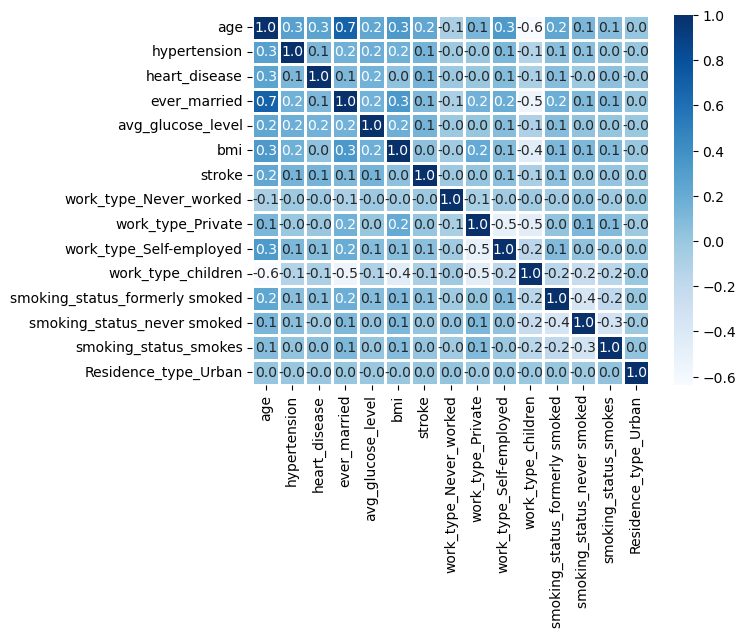

In [54]:
sns.heatmap(dataset.corr() , annot=True , fmt = '0.1f' , linewidths=1,cmap='Blues')

In [55]:
# sns.pairplot(dataset, hue="stroke" )

In [56]:
# dataset.hist(bins = 60, figsize = (15, 10))
# plt.suptitle("Feature Distribution", x = 0.5, y = 1.02, ha = "center")

<AxesSubplot:xlabel='gender', ylabel='count'>

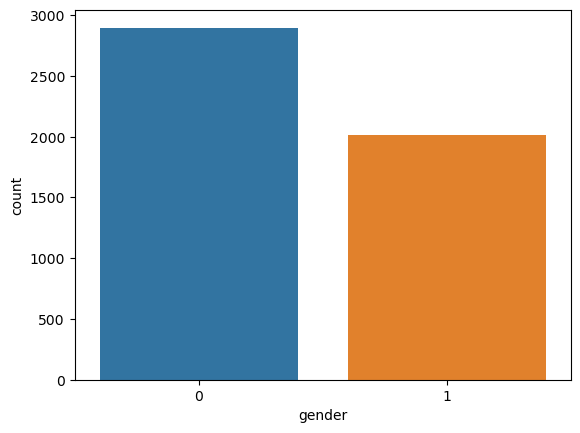

In [57]:
sns.countplot(dataset.gender)

# Modeling

In [58]:
dataset.head()

,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,Residence_type_Urban
0,1,1.069938,0,1,1,2.777797,0.981145,1,0,1,0,0,1,0,0,1
2,1,1.646336,0,1,1,0.014016,0.459086,1,0,1,0,0,0,1,0,0
3,0,0.271847,0,0,1,1.484266,0.701016,1,0,1,0,0,0,0,1,1
4,0,1.601998,1,0,1,1.549325,-0.623231,1,0,0,1,0,0,1,0,0
5,1,1.690675,0,0,1,1.821493,0.013426,1,0,1,0,0,1,0,0,1


In [59]:
x = dataset.drop('stroke' , axis = 1)
y = dataset.stroke

In [60]:
x_train , x_test , y_train , y_test = train_test_split(x , y , train_size=0.8 , random_state=42)

In [73]:
def modeling(model) :
    model.fit(x_train,y_train)
    pred = model.predict(x_test)
    accuracy = accuracy_score(pred,y_test)* 100 
    recall = recall_score(pred,y_test)* 100
    f_score = f1_score(pred,y_test)* 100
    print(f'Accuracy : {accuracy} , Recall : {recall} , F1 : {f_score}')
  
    sns.heatmap(confusion_matrix(pred , y_test ),annot=True , fmt='0.2f' , cmap = 'YlGnBu' , linewidths=1)

Accuracy : 94.60285132382892 , Recall : 0.0 , F1 : 0.0


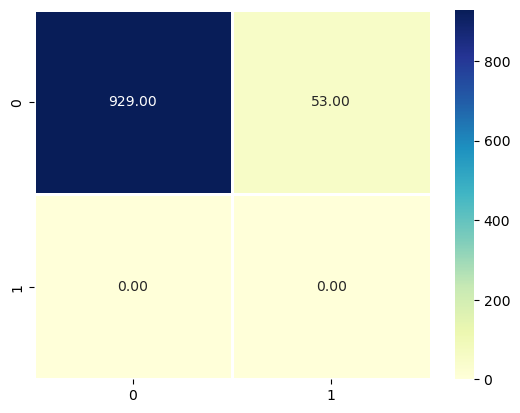

In [74]:
logist = LogisticRegression()
modeling(logist)

Accuracy : 94.5010183299389 , Recall : 0.0 , F1 : 0.0


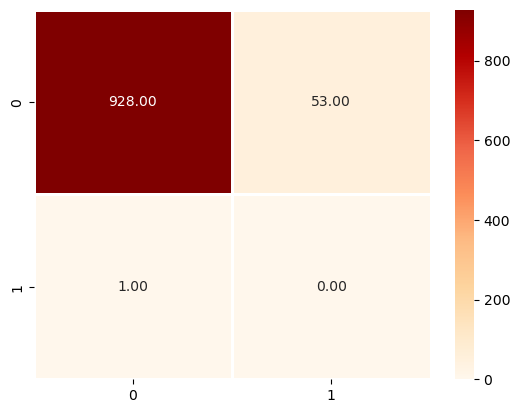

In [63]:
RFC_model = RandomForestClassifier(n_estimators= 50, criterion= 'gini')
modeling(RFC_model)

In [64]:
#   print(classification_report(y_test, pred))

In [64]:
dataset.stroke.value_counts()

0    4699
1     209
Name: stroke, dtype: int64

In [65]:
count_class_0, count_class_1 = dataset.stroke.value_counts()
print(count_class_0, count_class_1)

4699 209


In [66]:
count_class_0, count_class_1 = dataset.stroke.value_counts()

dataset_class_0 = dataset[dataset["stroke"] == 0]
dataset_class_1 = dataset[dataset["stroke"] == 1]

dataset_class_1_over = dataset_class_1.sample(count_class_0, replace = True)
dataset_over = pd.concat([dataset_class_0, dataset_class_1_over], axis = 0)
print(dataset_over.stroke.value_counts())

0    4699
1    4699
Name: stroke, dtype: int64


In [67]:
X_over = dataset_over.drop(["stroke"], axis = 1)
y_over = dataset_over.stroke

train_x_over, test_x_over, train_y_over, test_y_over = train_test_split(X_over, y_over, test_size = 0.2, random_state = 42)

In [68]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4908 entries, 0 to 5109
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   gender                          4908 non-null   object 
 1   age                             4908 non-null   float64
 2   hypertension                    4908 non-null   int64  
 3   heart_disease                   4908 non-null   int64  
 4   ever_married                    4908 non-null   int32  
 5   avg_glucose_level               4908 non-null   float64
 6   bmi                             4908 non-null   float64
 7   stroke                          4908 non-null   int64  
 8   work_type_Never_worked          4908 non-null   uint8  
 9   work_type_Private               4908 non-null   uint8  
 10  work_type_Self-employed         4908 non-null   uint8  
 11  work_type_children              4908 non-null   uint8  
 12  smoking_status_formerly smoked  49

In [ ]:
models = ['LogisticRegression','GradientBoostingClassifier' , 'RandomForestClassifier' , 'SVC']
result1 =[]
result2 =[]
result3 =[]

In [69]:
def modelingAfterSampling(model) :
    model.fit(train_x_over,train_y_over)
    pred = model.predict(test_x_over)
    accuracy = accuracy_score(pred,test_y_over)* 100 
    recall = recall_score(pred,test_y_over)* 100
    f_score = f1_score(pred,test_y_over)* 100
    result1.append(accuracy)
    result2.append(recall)
    result3.append(f_score)
    print(f'Accuracy : {accuracy} , Recall : {recall} , F1 : {f_score}')
    print(f'Train score {model.score(train_x_over,train_y_over)}')
    print(f'Test score {model.score(test_x_over,test_y_over)}')
  
    sns.heatmap(confusion_matrix(pred , test_y_over ),annot=True , fmt='0.2f')

In [ ]:
model1 = LogisticRegression()
model2 = GradientBoostingClassifier()
model3 = RandomForestClassifier()
model4 = SVC()

Accuracy : 77.4468085106383 , Recall : 76.71370967741935 , F1 : 78.21171634121274
Train score 0.7686884809789838
Test score 0.774468085106383


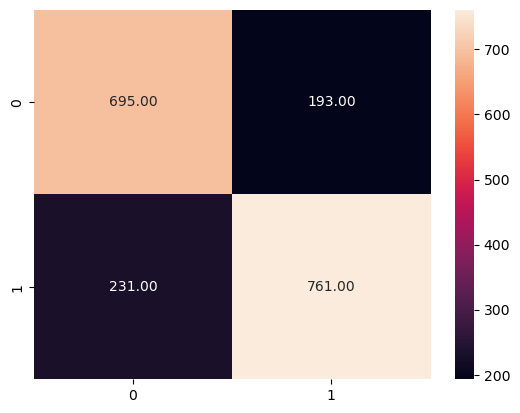

In [53]:
modelingAfterSampling(model1)

Accuracy : 87.44680851063829 , Recall : 82.99632352941177 , F1 : 88.44270323212537
Train score 0.8800212822559191
Test score 0.874468085106383


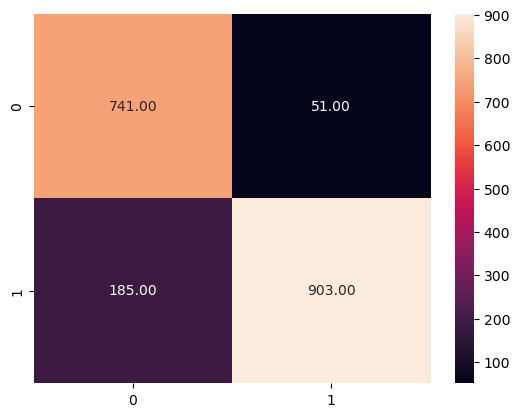

In [54]:
modelingAfterSampling(model2)

Accuracy : 99.36170212765958 , Recall : 98.75776397515527 , F1 : 99.375
Train score 1.0
Test score 0.9936170212765958


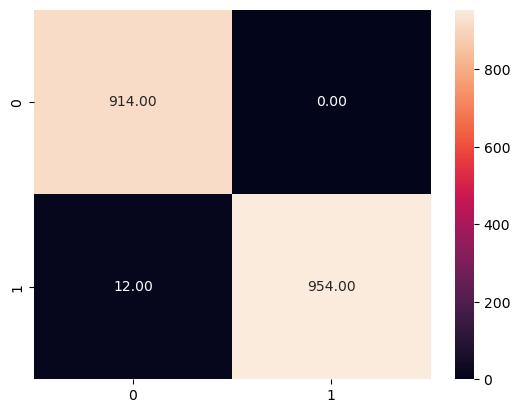

In [55]:
modelingAfterSampling(model3)

Accuracy : 85.95744680851064 , Recall : 82.12290502793296 , F1 : 86.98224852071006
Train score 0.8570098430433626
Test score 0.8595744680851064


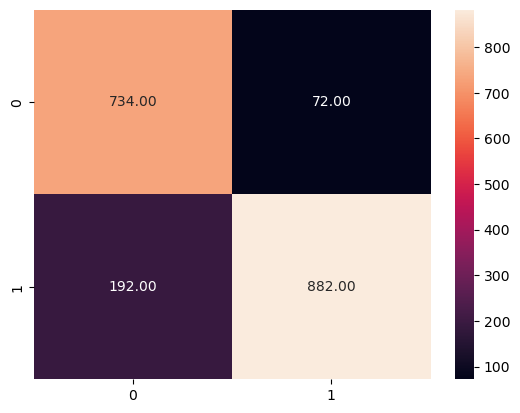

In [56]:
modelingAfterSampling(model4)

In [58]:
final_result = pd.DataFrame({
    'Algorithms' : models,
    'Accuracy' : result1,
    'Recall' : result2,
    'F1 Score' : result3,
})

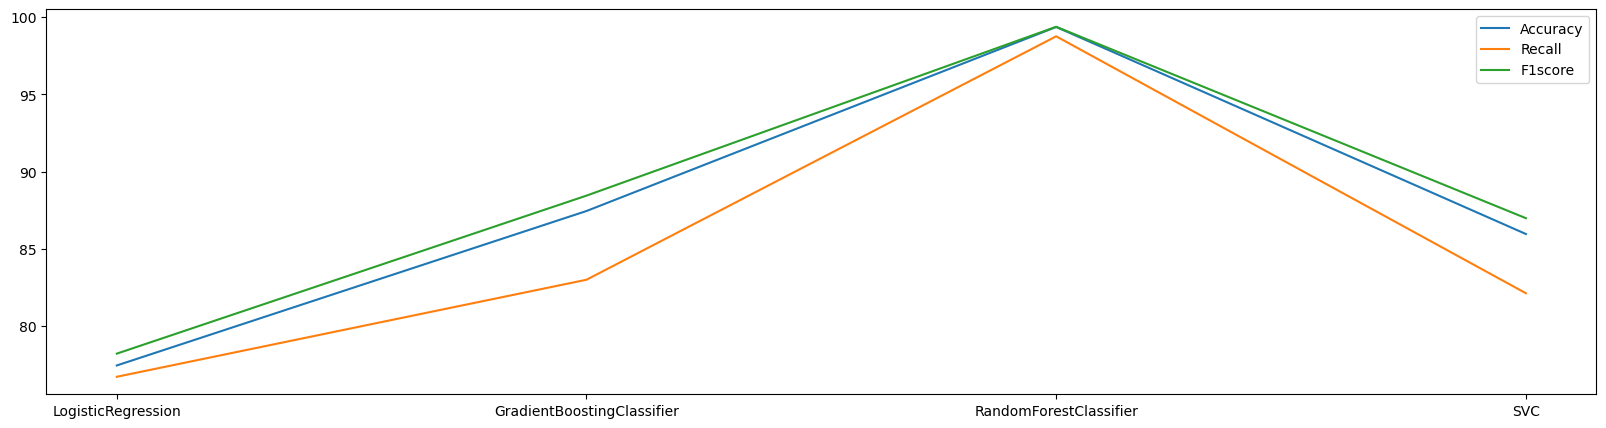

In [70]:
fig,a = plt.subplots(figsize=(20,5))
plt.plot(final_result.Algorithms , result1 , label = 'Accuracy')
plt.plot(final_result.Algorithms , result2  , label = 'Recall')
plt.plot(final_result.Algorithms , result3 , label = 'F1score')
plt.legend()
plt.show()